Gross            2.469427e+08
Retail           5.074067e+07
Use              2.819924e+06
Population       4.160572e+03
Gross Count      1.292872e+02
Retail Count     1.133789e+02
Use Count        4.442867e+01
Calendar Year    1.125664e+00
dtype: float64

The Most Important feature, Retail, has an linear regression accuracy of:  0.8810168474951405

The parameters for the best model are :
 m =  [[4.65004568]] 
 b =  [3909926.82315502]

Using multiple input features and avoiding other tax revenue components, gives a linear regression accuracy of:  0.7069695728326542

The parameters for the best multivariate model are :
 m =  [[   16559.04168509  3772153.78417461 -5301727.07814139  5747774.4543804 ]] 
 b =  [-1051402.47631273]

The Least Important feature, Calendar Year, has an linear regression accuracy of:  0.00014268782597559593

The best data model is:  
           Gross       Retail
0  1.831730e+06    489006.65
1  3.246572e+07   1857137.48
2  2.203010e+08  14313220.56
3  6.075238e+07

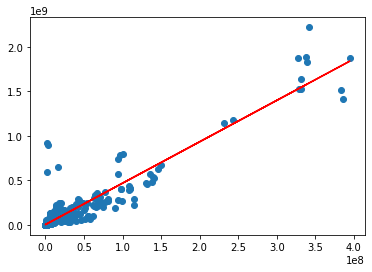

In [ ]:
import numpy as np
#Pandas is to store and make functional the data we're going to use
import pandas as pd
#Sklearn is to test whether our method, Standard deviation, is working for finding the best feature(s)
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#Read in data
#taxData = pd.read_csv('/content/sales-and-use-tax.csv')
taxData = pd.read_csv('https://data.burlingtonvt.gov/explore/dataset/sales-and-use-tax/download/?format=csv&timezone=US/Eastern&lang=en&use_labels_for_header=true&csv_separator=%2C')
#popData = pd.read_csv('/content/HS-STAT-Population-of-Vermont-towns-1930-2019.csv')
popData = pd.read_excel('https://www.healthvermont.gov/sites/default/files/documents/xls/HS-STAT-Population-of-Vermont-towns-1930-2019.xls', skiprows=4)

#dropped an ID column
popData = popData.drop('CTC', axis=1)

#Data Engineering step(s)
#Reshaped the data to get ready for merging with the tax data
popData2 = popData.melt(id_vars=['NAME'], var_name="Calendar Year", value_name="Population")

#Changing data type(dtype) for merging
popData2 = popData2.astype({'Calendar Year' : 'int64'})

#Merging datasets into one dataset
DATA = taxData.merge(popData2, left_on=["Town", "Calendar Year"], right_on=["NAME", "Calendar Year"], how='inner')

X_train, X_test, Y_train, Y_test = train_test_split(DATA['Retail'], DATA['Gross'], test_size=.2)

#Feature we want to predict
TargetFeature = "Gross"
#Separate Features and Target(s)
DATAFeatures = DATA.drop(TargetFeature, axis=1)

#Data Mining Steps - Using standard deviation
MostImportantFeature = DATAFeatures.std().sort_values(ascending=False)[0:1]
LeastImportantFeature = DATAFeatures.std().sort_values()[0:1]

#Final Data Engineering Steps
#Find most important feature, by our Data mining methodology
FeatureName = MostImportantFeature.index[0]


#Testing our choice from Data Mining Results
#Setting up input arrays for test

xb = np.array(X_train)
xb = xb.reshape(-1,1)
yb = np.array(Y_train)
yb = yb.reshape(-1,1)

xtest = np.array(X_test)
xtest = xb.reshape(-1,1)
ytest = np.array(Y_test)
ytest = yb.reshape(-1,1)


bestModel = lm.LinearRegression().fit(xb,yb)
BMscore = bestModel.score(xtest, ytest)

#if the regression score is above threshold use the chosen feature
BestDataModel = pd.DataFrame(DATA[['Gross', 'Retail']])

#multivariate example
xtm = DATA[['Population', 'Gross Count', 'Retail Count', 'Use Count']]
#xt = xt.reshape(-1,1)
ytm = np.array(DATA[TargetFeature])
ytm = ytm.reshape(-1,1)

testModelm = lm.LinearRegression().fit(xtm,ytm)
Testscorem = testModelm.score(xtm,ytm)

#Showing the bad case from Data Mining Results
xw = np.array(DATA[LeastImportantFeature.index[0]])
xw = xw.reshape(-1,1)
yw = np.array(DATA[TargetFeature])
yw = yw.reshape(-1,1)

worstModel = lm.LinearRegression().fit(xw,yw)
WMscore = worstModel.score(xw,yw)


print(DATA.std().sort_values(ascending=False))
print('\nThe Most Important feature, ', MostImportantFeature.index[0],', has an linear regression accuracy of:  ', BMscore, sep="")
print('\nThe parameters for the best model are :\n m = ', bestModel.coef_, '\n b = ', bestModel.intercept_)
print('\nUsing multiple input features and avoiding other tax revenue components, gives a linear regression accuracy of:  ', Testscorem, sep="")
print('\nThe parameters for the best multivariate model are :\n m = ', testModelm.coef_, '\n b = ', testModelm.intercept_)
print('\nThe Least Important feature, ', LeastImportantFeature.index[0],', has an linear regression accuracy of:  ', WMscore, sep="")
print('\nThe best data model is:  \n', BestDataModel.head(), '\n')

yb_pred = bestModel.predict(xtest)
yw_pred = worstModel.predict(xw)
#yt_pred = testModel.predict(xt)

plt.figure(0)
plt.scatter(xtest, ytest)
plt.plot(xtest, yb_pred, color='red')

#plt.figure(1)
#plt.scatter(xw, yw)
#plt.plot(xw, yw_pred, color='red')
